# Red Wine Quality - Exploratory Data Analysis

### Table of Contents

* [1. Load & explore data](#P01)
    * [Check the columns names & types](#P012)
    * [Check the range of values](#P013)
    * [Check the missing values](#P014)
    * [Check the target variable](#P015)
* [2. Feature selection](#P02)
    * [Density plots](#P021)
    * [Boxplots](#P022)
    * [Correlation matrix](#P023)
    * [Select columns](#P024)
* [3. Split the dataset](#P03)
* [4. Try various *classification* models](#P04)
    * [Logistic Regression](#P04_logistic_regression)
    * [Decision Tree](#P04_decision_tree)
        * [Search best max_depth](#P04_decision_tree_max_d)
        * [Search best min_samples_leaf](#P04_decision_tree_min_samples_leaf)
    * [Random Forest](#P04_random_forest)
        * [Search best n_estimators](#P04_random_forest_n_estimators)
        * [Search best max_depth](#P04_random_forest_max_d)
    * [XGBoost](#P04_xgboost)
        * [Search best eta](#P04_xgboost_eta)
        * [Search best max_depth](#P04_xgboost_max_depth)
        * [Search best min_child_weight](#P04_xgboost_min_child_weight)
    * [Model selection](#P04_result)
* [5. Export the selected model](#P05)
    * [Train the model](#P05_train)
    * [Export the model](#P05_export)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from tqdm import tqdm, notebook

# 1. Load & explore data <a class="anchor" id="P01"></a>

In [2]:
data = pd.read_csv('winequality-red.csv', sep=';', decimal='.')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Rename the columns <a class="anchor" id="P011"></a>

In [3]:
data.columns = data.columns.str.replace(' ', '_').str.lower()

### Check the columns names & types <a class="anchor" id="P012"></a>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   ph                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Check the ranges of values <a class="anchor" id="P013"></a>

In [5]:
data.describe(include='all')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Check the missing values <a class="anchor" id="P014"></a>

In [6]:
data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

> There is no missing values, so we don't need to handle it this time.

### Check the target variable <a class="anchor" id="P015"></a>

In [7]:
data['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

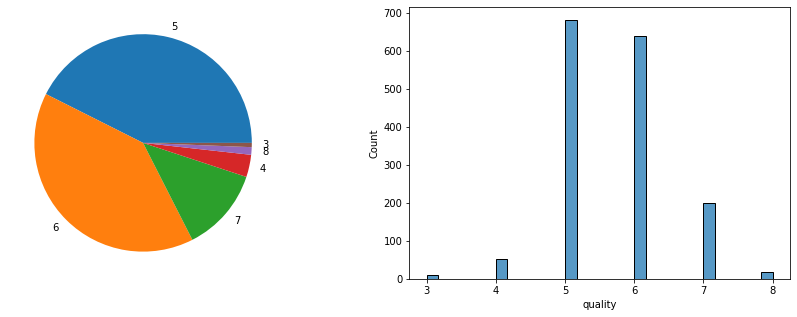

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
fig = plt.figure(figsize=[15,5])

plt.subplot(1,2,2)
sns.histplot(data['quality'])

plt.subplot(1,2,1)
check = data['quality'].value_counts()
plt.pie(list(check), labels=check.keys())

plt.show()
check

> The dataset is imbalanced toward the middle scores (5,6)... So we will need to use an appropriate metric.
>
> However there is no longtail to consider as the values are restricted to 10

# 2. Feature selection <a class="anchor" id="P02"></a>

### Density plots <a class="anchor" id="P021"></a>

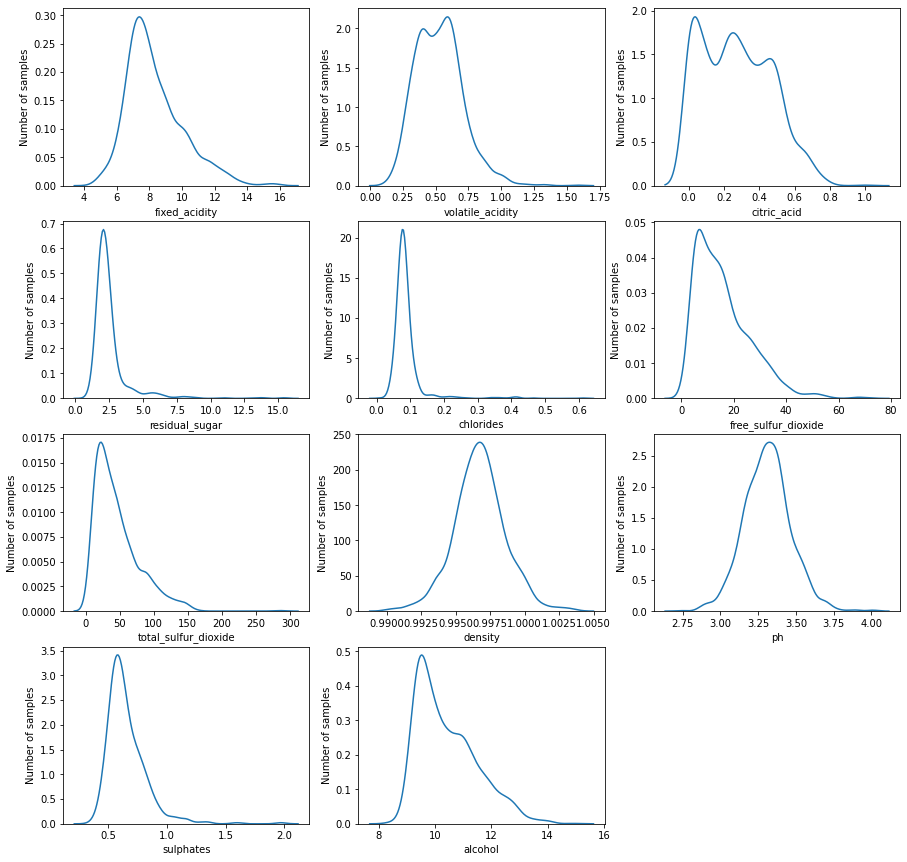

In [9]:
figure = plt.figure(figsize=[15,15])

for i,c in enumerate(data.columns[:-1]):
    plt.subplot(4,3,i+1)
    #plt.hist(data[c], bins=50, alpha=.75)
    #plt.plot(data[c])
    sns.kdeplot(data[c])
    plt.ylabel("Number of samples")
    plt.xlabel(c)

plt.show()

### Boxplots <a class="anchor" id="P022"></a>

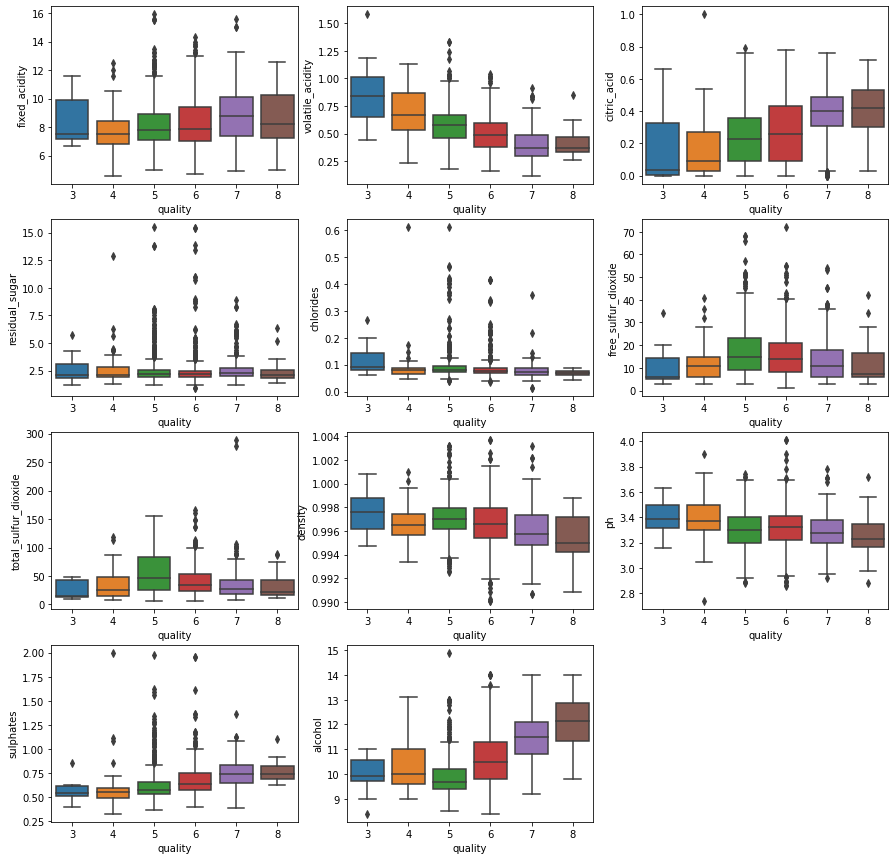

In [10]:
figure = plt.figure(figsize=[15,15])

for i,c in enumerate(data.columns[:-1]):
    plt.subplot(4,3,i+1)
    sns.boxplot(x='quality', y=c, notch=False, data=data)
    plt.ylabel(c)
    plt.xlabel('quality')

plt.show()

### **----- Comment -----**

> `volatile_acidity`, `density` and maybe `pH` seems negatively correlated.
>
> `citric_acid`, `alcohol`, `sulphates` and maybe `fixed_acicity` seems positively correlated.
>
> Let's confirm this with a correlation matrix.

### Correlation Matrix <a class="anchor" id="P023"></a>

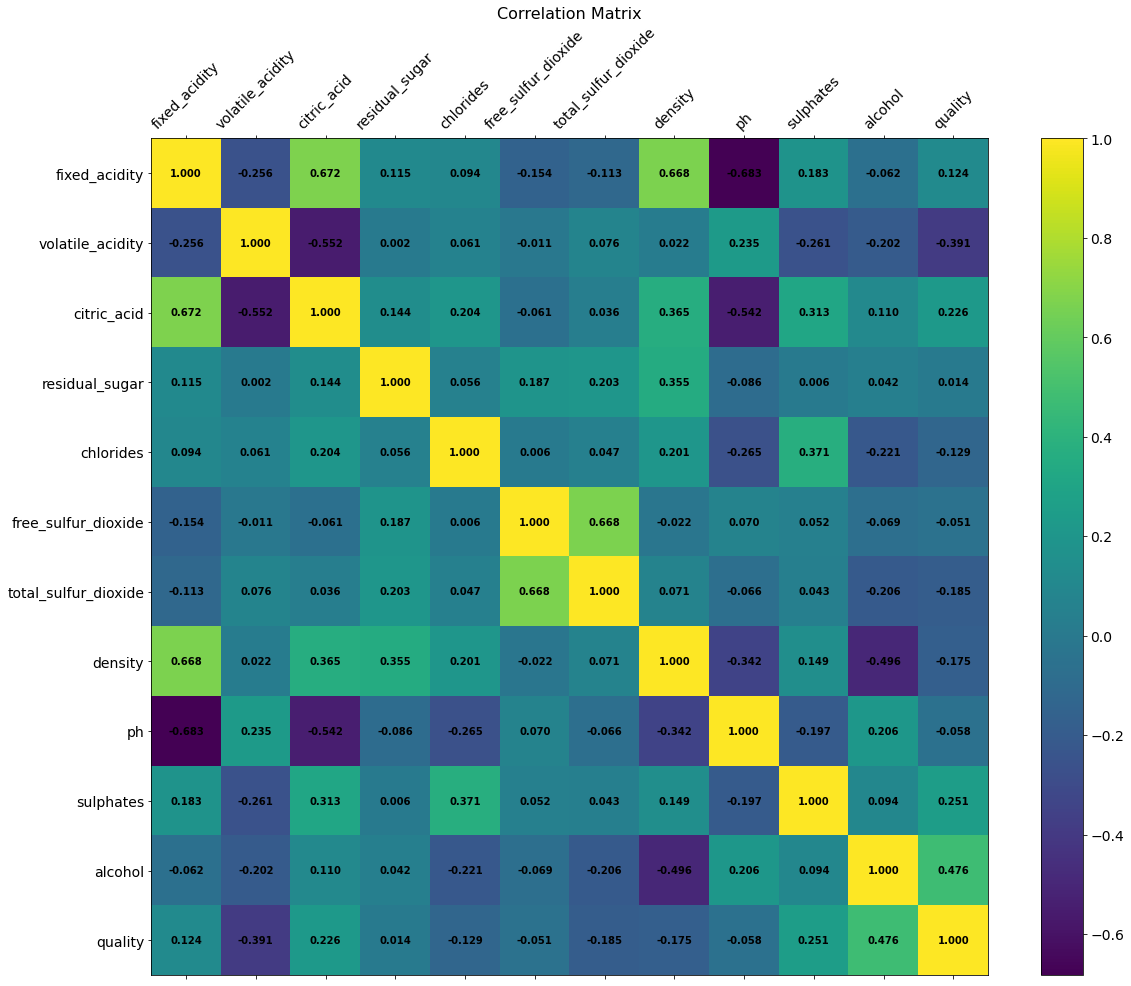

In [11]:
f = plt.figure(figsize=(19, 15))

plt.matshow(data.corr(), fignum=f.number)

plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

for (i, j), z in np.ndenumerate(data.corr()):
    plt.text(j, i, f"{z:0.3f}", ha='center', va='center', fontweight='demibold')

plt.title('Correlation Matrix', fontsize=16);

In [12]:
selection = data.corrwith(data['quality']).agg('abs').sort_values(ascending=False)
selection

quality                 1.000000
alcohol                 0.476166
volatile_acidity        0.390558
sulphates               0.251397
citric_acid             0.226373
total_sulfur_dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed_acidity           0.124052
ph                      0.057731
free_sulfur_dioxide     0.050656
residual_sugar          0.013732
dtype: float64

### Select columns with correlation > 0.1 <a class="anchor" id="P024"></a>

In [13]:
selected_columns = selection.index[selection > 0.15]
#selected_columns = selected_columns.drop(['quality'])
selected_columns

Index(['quality', 'alcohol', 'volatile_acidity', 'sulphates', 'citric_acid',
       'total_sulfur_dioxide', 'density'],
      dtype='object')

In [14]:
df = data[selected_columns]
df

,quality,alcohol,volatile_acidity,sulphates,citric_acid,total_sulfur_dioxide,density
0,5,9.4,0.700,0.56,0.00,34.0,0.99780
1,5,9.8,0.880,0.68,0.00,67.0,0.99680
2,5,9.8,0.760,0.65,0.04,54.0,0.99700
3,6,9.8,0.280,0.58,0.56,60.0,0.99800
4,5,9.4,0.700,0.56,0.00,34.0,0.99780
...,...,...,...,...,...,...,...
1594,5,10.5,0.600,0.58,0.08,44.0,0.99490
1595,6,11.2,0.550,0.76,0.10,51.0,0.99512
1596,6,11.0,0.510,0.75,0.13,40.0,0.99574
1597,5,10.2,0.645,0.71,0.12,44.0,0.99547


# 3. Split the dataset <a class="anchor" id="P03"></a>

### Split the predictors and the target 

In [15]:
y_full = df['quality']
y_full.head(2)

0    5
1    5
Name: quality, dtype: int64

In [16]:
dt_full = df.copy()
dt_full = dt_full.drop(columns='quality')
dt_full.head(2)

,alcohol,volatile_acidity,sulphates,citric_acid,total_sulfur_dioxide,density
0,9.4,0.70,0.56,0.0,34.0,0.9978
1,9.8,0.88,0.68,0.0,67.0,0.9968


### Create train, validation, test (& full_train) splits

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
dt_train_full, dt_test, y_train_full, y_test = train_test_split(dt_full, y_full, test_size=0.2, random_state=42)
dt_train, dt_valid, y_train, y_valid = train_test_split(dt_train_full, y_train_full, test_size=dt_test.shape[0], random_state=42)

In [19]:
assert(dt_valid.shape[0] == dt_test.shape[0])

In [20]:
assert(dt_full.shape[0] == dt_train.shape[0] + dt_valid.shape[0] + dt_test.shape[0])

# 4. Try various *classification* models <a class="anchor" id="P04"></a>

In [21]:
X_train = dt_train.values
X_valid = dt_valid.values
X_test = dt_test.values

In [205]:
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, precision_score, recall_score

def evaluate_classification(y_true, y_pred, y_pred_proba, multi_class='ovr'):
    roc = roc_auc_score(y_true, y_pred_proba, multi_class=multi_class)
    f1 = f1_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=False)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=False)
    print(f"ROCAUC:{roc:6.3f} | F1:{f1:6.3f} (precision:{precision:6.3f} & recall:{recall:6.3f}) | Accuracy:{accuracy:6.3f}")
    return roc, f1

## Logistic Regression  <a class="anchor" id="P04_logistic_regression"></a>

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
logistic_model = LogisticRegression(n_jobs=-1).fit(X_train, y_train)

In [93]:
y_pred = logistic_model.predict(X_valid)
y_pred_proba = logistic_model.predict_proba(X_valid)

In [94]:
evaluate_classification(y_valid, y_pred, y_pred_proba)

ROCAUC: 0.644 | F1: 0.525 (precision: 0.488 & recall: 0.572) | Accuracy: 0.572


(0.6438559520307191, 0.5251070055904961)

### **----- FINAL RESULT -----**

> The best `ROC AUC score` for a basic **Logistic Regression** appears to be around `0.644`
---

## Decision Tree (regression) <a class="anchor" id="P04_decision_tree"></a>

In [95]:
from sklearn.tree import DecisionTreeClassifier

### Train a basic model

In [96]:
dtree_model = DecisionTreeClassifier(random_state=1)

In [97]:
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [98]:
y_pred = dtree_model.predict(X_valid)
y_pred_proba = dtree_model.predict_proba(X_valid)

In [99]:
evaluate_classification(y_valid, y_pred, y_pred_proba)

ROCAUC: 0.632 | F1: 0.602 (precision: 0.615 & recall: 0.603) | Accuracy: 0.603


(0.6318049986333406, 0.601814675471555)

### **----- TMP RESULT -----**

> The best `ROC AUC score` for the ***default* Decision Tree** appears to be around `0.632`
---

### Search best `max_depth`  <a class="anchor" id="P04_decision_tree_max_d"></a>

In [104]:
scores = {}
values = values = [1,2,3,4,5,6,7,8,9,10,15,20,25]

for v in notebook.tqdm(values):
    dtree_model = DecisionTreeClassifier(max_depth=v, random_state=1)
    dtree_model.fit(X_train, y_train)
    y_pred = dtree_model.predict(X_valid)
    y_pred_proba = dtree_model.predict_proba(X_valid)
    print(f"max_depth:{int(v):3}  =>  ", end="")
    scores[int(v)] = evaluate_classification(y_valid, y_pred, y_pred_proba)

  0%|          | 0/13 [00:00<?, ?it/s]

max_depth:  1  =>  ROCAUC: 0.665 | F1: 0.522 (precision: 0.478 & recall: 0.581) | Accuracy: 0.581
max_depth:  2  =>  ROCAUC: 0.667 | F1: 0.522 (precision: 0.478 & recall: 0.581) | Accuracy: 0.581
max_depth:  3  =>  ROCAUC: 0.735 | F1: 0.524 (precision: 0.542 & recall: 0.541) | Accuracy: 0.541
max_depth:  4  =>  ROCAUC: 0.748 | F1: 0.588 (precision: 0.572 & recall: 0.613) | Accuracy: 0.613
max_depth:  5  =>  ROCAUC: 0.765 | F1: 0.555 (precision: 0.545 & recall: 0.575) | Accuracy: 0.575
max_depth:  6  =>  ROCAUC: 0.736 | F1: 0.543 (precision: 0.543 & recall: 0.559) | Accuracy: 0.559
max_depth:  7  =>  ROCAUC: 0.749 | F1: 0.595 (precision: 0.600 & recall: 0.603) | Accuracy: 0.603
max_depth:  8  =>  ROCAUC: 0.622 | F1: 0.596 (precision: 0.591 & recall: 0.606) | Accuracy: 0.606
max_depth:  9  =>  ROCAUC: 0.624 | F1: 0.577 (precision: 0.578 & recall: 0.584) | Accuracy: 0.584
max_depth: 10  =>  ROCAUC: 0.621 | F1: 0.591 (precision: 0.597 & recall: 0.594) | Accuracy: 0.594
max_depth: 15  =>  R

Text(0.5, 0, 'max_depth')

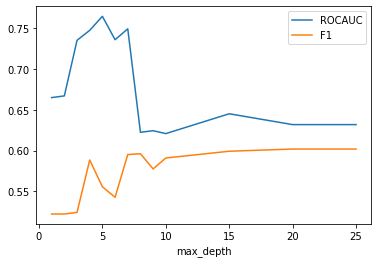

In [106]:
plt.plot(scores.keys(), scores.values(), label=['ROCAUC','F1'])
plt.legend()
plt.xlabel("max_depth")

### **----- TMP RESULT -----**

> The best `ROC AUC score` for a Decision Tree appears to be around `0.673` with `max_depth=5`
---

### Search best `min_samples_leaf`  <a class="anchor" id="P04_decision_tree_min_samples_leaf"></a>

In [107]:
scores = {}
values = values = [1,2,3,4,5,6,7,8,9,10,15,20,25]
max_d = 5

for v in notebook.tqdm(values):
    dtree_model = DecisionTreeClassifier(max_depth=max_d, min_samples_leaf=v, random_state=1)
    dtree_model.fit(X_train, y_train)
    y_pred = dtree_model.predict(X_valid)
    y_pred_proba = dtree_model.predict_proba(X_valid)
    print(f"min_samples_leaf:{int(v):3}  =>  ", end="")
    scores[int(v)] = evaluate_classification(y_valid, y_pred, y_pred_proba)

  0%|          | 0/13 [00:00<?, ?it/s]

min_samples_leaf:  1  =>  ROCAUC: 0.765 | F1: 0.555 (precision: 0.545 & recall: 0.575) | Accuracy: 0.575
min_samples_leaf:  2  =>  ROCAUC: 0.766 | F1: 0.556 (precision: 0.548 & recall: 0.575) | Accuracy: 0.575
min_samples_leaf:  3  =>  ROCAUC: 0.767 | F1: 0.561 (precision: 0.552 & recall: 0.581) | Accuracy: 0.581
min_samples_leaf:  4  =>  ROCAUC: 0.766 | F1: 0.560 (precision: 0.550 & recall: 0.581) | Accuracy: 0.581
min_samples_leaf:  5  =>  ROCAUC: 0.779 | F1: 0.549 (precision: 0.541 & recall: 0.569) | Accuracy: 0.569
min_samples_leaf:  6  =>  ROCAUC: 0.780 | F1: 0.549 (precision: 0.541 & recall: 0.569) | Accuracy: 0.569
min_samples_leaf:  7  =>  ROCAUC: 0.787 | F1: 0.555 (precision: 0.548 & recall: 0.575) | Accuracy: 0.575
min_samples_leaf:  8  =>  ROCAUC: 0.787 | F1: 0.555 (precision: 0.548 & recall: 0.575) | Accuracy: 0.575
min_samples_leaf:  9  =>  ROCAUC: 0.786 | F1: 0.555 (precision: 0.548 & recall: 0.575) | Accuracy: 0.575
min_samples_leaf: 10  =>  ROCAUC: 0.784 | F1: 0.555 (pr

Text(0.5, 0, 'min_samples_leaf')

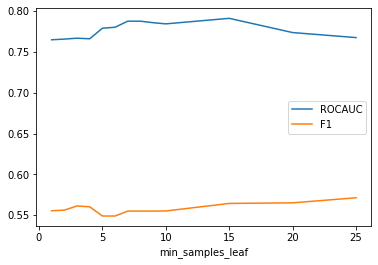

In [108]:
plt.plot(scores.keys(), scores.values(), label=['ROCAUC','F1'])
plt.legend()
plt.xlabel("min_samples_leaf")

### **----- FINAL RESULT -----**

> The best `ROC AUC score` for a **Decision Tree** appears to be around `0.791` with `max_depth=5` and `min_samples_leaf=15`
>
> That doesn't seem promising, so we will stop here for now and see other methods.
---

## Random forest (regression) <a class="anchor" id="P04_random_forest"></a>

In [109]:
from sklearn.ensemble import RandomForestClassifier

### Train a basic model

In [110]:
rforest_model = RandomForestClassifier(n_estimators=10, random_state=1, n_jobs=-1)

In [111]:
rforest_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=1)

In [112]:
y_pred = rforest_model.predict(X_valid)
y_pred_proba = rforest_model.predict_proba(X_valid)

In [113]:
evaluate_classification(y_valid, y_pred, y_pred_proba)

ROCAUC: 0.724 | F1: 0.632 (precision: 0.624 & recall: 0.647) | Accuracy: 0.647


(0.7242672495539278, 0.6319855808507218)

### **----- TMP RESULT -----**

> The best `ROC AUC score` for the ***default* Random Forest** appears to be around `0.724`
---

### Search best `n_estimators`  <a class="anchor" id="P04_random_forest_n_estimators"></a>

In [114]:
scores = {}
values = np.linspace(10,600,60)

for v in notebook.tqdm(values):
    rforest_model = RandomForestClassifier(n_estimators=int(v), random_state=1, n_jobs=-1)
    rforest_model.fit(X_train, y_train)
    y_pred = rforest_model.predict(X_valid)
    y_pred_proba = rforest_model.predict_proba(X_valid)
    print(f"n_estimators:{int(v):4}  =>  ", end="")
    scores[int(v)] = evaluate_classification(y_valid, y_pred, y_pred_proba)

  0%|          | 0/60 [00:00<?, ?it/s]

n_estimators:  10  =>  ROCAUC: 0.724 | F1: 0.632 (precision: 0.624 & recall: 0.647) | Accuracy: 0.647
n_estimators:  20  =>  ROCAUC: 0.734 | F1: 0.635 (precision: 0.628 & recall: 0.650) | Accuracy: 0.650
n_estimators:  30  =>  ROCAUC: 0.750 | F1: 0.669 (precision: 0.661 & recall: 0.684) | Accuracy: 0.684
n_estimators:  40  =>  ROCAUC: 0.769 | F1: 0.671 (precision: 0.665 & recall: 0.688) | Accuracy: 0.688
n_estimators:  50  =>  ROCAUC: 0.763 | F1: 0.683 (precision: 0.674 & recall: 0.700) | Accuracy: 0.700
n_estimators:  60  =>  ROCAUC: 0.767 | F1: 0.693 (precision: 0.685 & recall: 0.709) | Accuracy: 0.709
n_estimators:  70  =>  ROCAUC: 0.761 | F1: 0.686 (precision: 0.677 & recall: 0.703) | Accuracy: 0.703
n_estimators:  80  =>  ROCAUC: 0.767 | F1: 0.682 (precision: 0.674 & recall: 0.700) | Accuracy: 0.700
n_estimators:  90  =>  ROCAUC: 0.762 | F1: 0.678 (precision: 0.672 & recall: 0.697) | Accuracy: 0.697
n_estimators: 100  =>  ROCAUC: 0.761 | F1: 0.672 (precision: 0.666 & recall: 0.691

Text(0.5, 0, 'n_estimators')

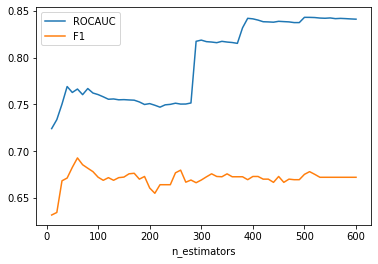

In [115]:
plt.plot(scores.keys(), scores.values(), label=['ROCAUC','F1'])
plt.legend()
plt.xlabel("n_estimators")

In [116]:
keys = pd.Series([k for k,v in scores.items()])
rocauc = pd.Series([v[0] for k,v in scores.items()])
f1 = pd.Series([v[1] for k,v in scores.items()])

print(f"max ROCAUC:{rocauc.max():.3f}  =>  n_estimators:{keys[rocauc.idxmax()]:3}")

max ROCAUC:0.843  =>  n_estimators:500


### **----- TMP RESULT -----**

> The best `ROC AUC score` for a **Random Forest** appears to be around `0.843` with `n_estimarors=500`
---

### Search best `max_depth` / `n_estimators` combination <a class="anchor" id="P04_random_forest_max_d"></a>

In [120]:
scores = {'rocauc':{}, 'f1':{}}

for max_d in notebook.tqdm([10,15,20,25]):
    
    scores['rocauc'][max_d] = {}
    scores['f1'][max_d] = {}
    
    for ne in notebook.tqdm(np.linspace(10,600,60)):
        
        rforest_model = RandomForestClassifier(n_estimators=int(ne), random_state=1, n_jobs=-1, max_depth=max_d)
        rforest_model.fit(X_train, y_train)
        y_pred = rforest_model.predict(X_valid)
        y_pred_proba = rforest_model.predict_proba(X_valid)

        tqdm.write(f"max_d:{max_d:3} - n_estimators:{int(ne):4}  =>  ", end="")
        rocauc, f1 = evaluate_classification(y_valid, y_pred, y_pred_proba)
        scores['rocauc'][max_d][int(ne)] = rocauc
        scores['f1'][max_d][int(ne)] = f1

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

max_d: 10 - n_estimators:  10  =>  ROCAUC: 0.678 | F1: 0.611 (precision: 0.636 & recall: 0.625) | Accuracy: 0.625
max_d: 10 - n_estimators:  20  =>  ROCAUC: 0.757 | F1: 0.637 (precision: 0.628 & recall: 0.659) | Accuracy: 0.659
max_d: 10 - n_estimators:  30  =>  ROCAUC: 0.772 | F1: 0.643 (precision: 0.627 & recall: 0.666) | Accuracy: 0.666
max_d: 10 - n_estimators:  40  =>  ROCAUC: 0.759 | F1: 0.660 (precision: 0.644 & recall: 0.684) | Accuracy: 0.684
max_d: 10 - n_estimators:  50  =>  ROCAUC: 0.747 | F1: 0.655 (precision: 0.640 & recall: 0.678) | Accuracy: 0.678
max_d: 10 - n_estimators:  60  =>  ROCAUC: 0.747 | F1: 0.660 (precision: 0.646 & recall: 0.684) | Accuracy: 0.684
max_d: 10 - n_estimators:  70  =>  ROCAUC: 0.749 | F1: 0.670 (precision: 0.658 & recall: 0.694) | Accuracy: 0.694
max_d: 10 - n_estimators:  80  =>  ROCAUC: 0.799 | F1: 0.663 (precision: 0.651 & recall: 0.688) | Accuracy: 0.688
max_d: 10 - n_estimators:  90  =>  ROCAUC: 0.792 | F1: 0.665 (precision: 0.654 & recall:

  0%|          | 0/60 [00:00<?, ?it/s]

max_d: 15 - n_estimators:  10  =>  ROCAUC: 0.714 | F1: 0.632 (precision: 0.635 & recall: 0.641) | Accuracy: 0.641
max_d: 15 - n_estimators:  20  =>  ROCAUC: 0.732 | F1: 0.665 (precision: 0.678 & recall: 0.675) | Accuracy: 0.675
max_d: 15 - n_estimators:  30  =>  ROCAUC: 0.728 | F1: 0.660 (precision: 0.655 & recall: 0.675) | Accuracy: 0.675
max_d: 15 - n_estimators:  40  =>  ROCAUC: 0.725 | F1: 0.682 (precision: 0.673 & recall: 0.700) | Accuracy: 0.700
max_d: 15 - n_estimators:  50  =>  ROCAUC: 0.805 | F1: 0.681 (precision: 0.671 & recall: 0.700) | Accuracy: 0.700
max_d: 15 - n_estimators:  60  =>  ROCAUC: 0.811 | F1: 0.685 (precision: 0.677 & recall: 0.703) | Accuracy: 0.703
max_d: 15 - n_estimators:  70  =>  ROCAUC: 0.825 | F1: 0.679 (precision: 0.672 & recall: 0.697) | Accuracy: 0.697
max_d: 15 - n_estimators:  80  =>  ROCAUC: 0.828 | F1: 0.688 (precision: 0.678 & recall: 0.706) | Accuracy: 0.706
max_d: 15 - n_estimators:  90  =>  ROCAUC: 0.823 | F1: 0.690 (precision: 0.681 & recall:

  0%|          | 0/60 [00:00<?, ?it/s]

max_d: 20 - n_estimators:  10  =>  ROCAUC: 0.724 | F1: 0.635 (precision: 0.627 & recall: 0.650) | Accuracy: 0.650
max_d: 20 - n_estimators:  20  =>  ROCAUC: 0.735 | F1: 0.635 (precision: 0.628 & recall: 0.650) | Accuracy: 0.650
max_d: 20 - n_estimators:  30  =>  ROCAUC: 0.746 | F1: 0.669 (precision: 0.661 & recall: 0.684) | Accuracy: 0.684
max_d: 20 - n_estimators:  40  =>  ROCAUC: 0.769 | F1: 0.663 (precision: 0.658 & recall: 0.678) | Accuracy: 0.678
max_d: 20 - n_estimators:  50  =>  ROCAUC: 0.763 | F1: 0.677 (precision: 0.669 & recall: 0.694) | Accuracy: 0.694
max_d: 20 - n_estimators:  60  =>  ROCAUC: 0.764 | F1: 0.693 (precision: 0.685 & recall: 0.709) | Accuracy: 0.709
max_d: 20 - n_estimators:  70  =>  ROCAUC: 0.757 | F1: 0.686 (precision: 0.677 & recall: 0.703) | Accuracy: 0.703
max_d: 20 - n_estimators:  80  =>  ROCAUC: 0.764 | F1: 0.682 (precision: 0.674 & recall: 0.700) | Accuracy: 0.700
max_d: 20 - n_estimators:  90  =>  ROCAUC: 0.759 | F1: 0.676 (precision: 0.669 & recall:

  0%|          | 0/60 [00:00<?, ?it/s]

max_d: 25 - n_estimators:  10  =>  ROCAUC: 0.724 | F1: 0.632 (precision: 0.624 & recall: 0.647) | Accuracy: 0.647
max_d: 25 - n_estimators:  20  =>  ROCAUC: 0.734 | F1: 0.635 (precision: 0.628 & recall: 0.650) | Accuracy: 0.650
max_d: 25 - n_estimators:  30  =>  ROCAUC: 0.750 | F1: 0.669 (precision: 0.661 & recall: 0.684) | Accuracy: 0.684
max_d: 25 - n_estimators:  40  =>  ROCAUC: 0.769 | F1: 0.671 (precision: 0.665 & recall: 0.688) | Accuracy: 0.688
max_d: 25 - n_estimators:  50  =>  ROCAUC: 0.763 | F1: 0.683 (precision: 0.674 & recall: 0.700) | Accuracy: 0.700
max_d: 25 - n_estimators:  60  =>  ROCAUC: 0.767 | F1: 0.693 (precision: 0.685 & recall: 0.709) | Accuracy: 0.709
max_d: 25 - n_estimators:  70  =>  ROCAUC: 0.761 | F1: 0.686 (precision: 0.677 & recall: 0.703) | Accuracy: 0.703
max_d: 25 - n_estimators:  80  =>  ROCAUC: 0.767 | F1: 0.682 (precision: 0.674 & recall: 0.700) | Accuracy: 0.700
max_d: 25 - n_estimators:  90  =>  ROCAUC: 0.762 | F1: 0.678 (precision: 0.672 & recall:

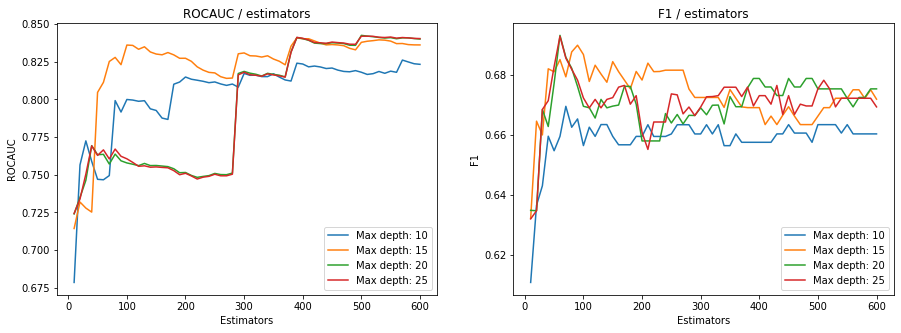

In [121]:
fig = plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
for k,v in scores['rocauc'].items():
    plt.plot(v.keys(), v.values(), label=f"Max depth: {k}")
    
plt.xlabel("Estimators")
plt.ylabel("ROCAUC")
plt.title("ROCAUC / estimators")
plt.legend()

plt.subplot(1,2,2)
for k,v in scores['f1'].items():
    plt.plot(v.keys(), v.values(), label=f"Max depth: {k}")
    
plt.xlabel("Estimators")
plt.ylabel("F1")
plt.title("F1 / estimators")
plt.legend()


plt.show()

In [122]:
for i, v in scores['rocauc'].items():
    print(f"max_depth:{i:3} - ", end="")
    z1 = pd.Series([w for j,w in v.items()])
    z2 = pd.Series([j for j,w in v.items()])
    print(f"n_estimators:{z2[z1.idxmax()]}  =>  max ROCAUC:{z1.max()}")

max_depth: 10 - n_estimators:570  =>  max ROCAUC:0.8261925219101518
max_depth: 15 - n_estimators:390  =>  max ROCAUC:0.8409477752290829
max_depth: 20 - n_estimators:500  =>  max ROCAUC:0.8426152469905585
max_depth: 25 - n_estimators:510  =>  max ROCAUC:0.8420490742702476


### **----- FINAL RESULT -----**

> The best `ROC AUC score` for a **Random Forest** appears to be around `0.843` with `n_estimarors=500` and `max_depth=20`
>
> That is interesting, be let see if we can do better with another method.
---

## XGboost (regression) <a class="anchor" id="P04_xgboost"></a>

In [123]:
import xgboost as xgb

### Progress Bar

In [124]:
class xgb_progress(xgb.callback.TrainingCallback):
    """ Custom class used to create tqdm callbacks with XGBoost
        example: xgb_progressbar = xgb_progress(num_rounds)
                 xgb.train( ... , callbacks=[xgb_progressbar])
    """
    
    def __init__(self, rounds):
        self.rounds = rounds
        self.pbar = notebook.tqdm(total=rounds)
        
    def after_iteration(self, model, epoch, evals_log):
        self.pbar.update(1)

### Create DMatrix for train and validation

In [125]:
features = dt_full.columns
df_train_xgb = xgb.DMatrix(X_train, label=y_train, feature_names=features)
df_valid_xgb = xgb.DMatrix(X_valid, label=y_valid, feature_names=features)

### Create a watchlist

In [130]:
watchlist = [(df_train_xgb, 'train'), (df_valid_xgb, 'val')]

### Train a basic model

In [131]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    #'objective': 'reg:squarederror', # <-- for regression 
    #'objective': 'binary:logistic', # <-- for binary classification
    'objective': 'multi:softmax', # <-- for multiclass classification
    'num_class': max(y_pred)+1, 
    #'eval_metric': 'auc',           # <-- for binary classification, default according to objective
    'nthread': None,
    #'disable_default_eval_metric': 1,
    
    'seed': 1,
    'verbosity': 1,
}

num_rounds = 100
early_stop = 10

> The **ROCAUC isn't avaible in XGBoost** for multiclass classification...
> 
> So wi will use the default log-loss and then we will compute the ROCAUC on the predictions

In [132]:
xgb_progressbar = xgb_progress(num_rounds)

progress = dict()

xgb_model = xgb.train(
                        xgb_params, 
                        df_train_xgb, 
                        # feval=rocauc_multi,
                        num_boost_round=num_rounds, 
                        early_stopping_rounds=early_stop,
                        verbose_eval=1, 
                        evals=watchlist,
                        callbacks=[xgb_progressbar],
                        evals_result=progress,
                        )

  0%|          | 0/100 [00:00<?, ?it/s]

[22:54:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-mlogloss:1.59490	val-mlogloss:1.71251
[1]	train-mlogloss:1.30491	val-mlogloss:1.49134
[2]	train-mlogloss:1.10892	val-mlogloss:1.34520
[3]	train-mlogloss:0.96061	val-mlogloss:1.23988
[4]	train-mlogloss:0.85196	val-mlogloss:1.16858
[5]	train-mlogloss:0.77346	val-mlogloss:1.11829
[6]	train-mlogloss:0.70201	val-mlogloss:1.07989
[7]	train-mlogloss:0.64762	val-mlogloss:1.05252
[8]	train-mlogloss:0.59305	val-mlogloss:1.02871
[9]	train-mlogloss:0.55440	val-mlogloss:1.01285
[10]	train-mlogloss:0.51578	val-mlogloss:1.00000
[11]	train-mlogloss:0.48536	val-mlogloss:0.99105
[12]	train-mlogloss:0.46179	val-mlogloss:0.98297
[13]	train-mlogloss:0.44193	val-mlogloss:0.97954
[14]	train-mlogloss:0.41465	val-mlogloss:0.97164
[15]	train-mlogloss:0.3

In [133]:
xgb_model.best_ntree_limit-1

15

In [135]:
progress['train']['mlogloss'][-5:]

[0.32015, 0.305137, 0.298411, 0.291747, 0.280725]

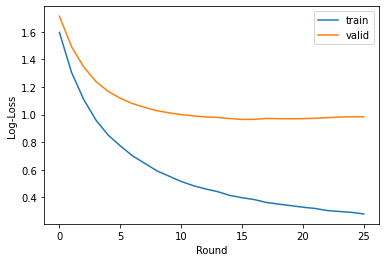

In [136]:
plt.plot(progress['train']['mlogloss'], label='train')
plt.plot(progress['val']['mlogloss'], label='valid')

plt.xlabel("Round")
plt.ylabel("Log-Loss")
plt.legend()

### Search best `eta`  <a class="anchor" id="P04_xgboost_eta"></a>

In [137]:
xgb_progressbar = xgb_progress(num_rounds*3)

scores = {}

for eta_v in [0.01, 0.1, 0.3]:
    
    progress = dict()

    xgb_params['eta'] = eta_v

    xgb_model = xgb.train(
        xgb_params, 
        df_train_xgb, 
        num_boost_round=num_rounds, 
        early_stopping_rounds=early_stop,
        verbose_eval=1, 
        evals=watchlist,
        callbacks=[xgb_progressbar],
        evals_result=progress,
    )
    
    print(f"\neta:{eta_v} best_ntree_limit:{xgb_model.best_ntree_limit-1}\n")
    
    scores[eta_v] = progress['val']['mlogloss']

  0%|          | 0/300 [00:00<?, ?it/s]

[22:55:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-mlogloss:2.17514	val-mlogloss:2.17915
[1]	train-mlogloss:2.15366	val-mlogloss:2.16186
[2]	train-mlogloss:2.13263	val-mlogloss:2.14512
[3]	train-mlogloss:2.11225	val-mlogloss:2.12850
[4]	train-mlogloss:2.09230	val-mlogloss:2.11235
[5]	train-mlogloss:2.07286	val-mlogloss:2.09664
[6]	train-mlogloss:2.05401	val-mlogloss:2.08132
[7]	train-mlogloss:2.03581	val-mlogloss:2.06618
[8]	train-mlogloss:2.01781	val-mlogloss:2.05155
[9]	train-mlogloss:2.00030	val-mlogloss:2.03712
[10]	train-mlogloss:1.98311	val-mlogloss:2.02284
[11]	train-mlogloss:1.96631	val-mlogloss:2.00927
[12]	train-mlogloss:1.94976	val-mlogloss:1.99584
[13]	train-mlogloss:1.93354	val-mlogloss:1.98268
[14]	train-mlogloss:1.91776	val-mlogloss:1.96960
[15]	train-mlogloss:1.9

[57]	train-mlogloss:0.34820	val-mlogloss:0.94981
[58]	train-mlogloss:0.34359	val-mlogloss:0.95021
[59]	train-mlogloss:0.33700	val-mlogloss:0.95040
[60]	train-mlogloss:0.33256	val-mlogloss:0.95107
[61]	train-mlogloss:0.32864	val-mlogloss:0.95122
[62]	train-mlogloss:0.32485	val-mlogloss:0.95036
[63]	train-mlogloss:0.31932	val-mlogloss:0.95116
[64]	train-mlogloss:0.31610	val-mlogloss:0.95136
[65]	train-mlogloss:0.31077	val-mlogloss:0.95157
[66]	train-mlogloss:0.30776	val-mlogloss:0.95226

eta:0.1 best_ntree_limit:57

[22:55:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-mlogloss:1.59490	val-mlogloss:1.71251
[1]	train-mlogloss:1.30491	val-mlogloss:1.49134
[2]	train-mlogloss:1.10892	val-mlogloss:1.34520
[3]	train-mlogloss:0.96061	val-mlogloss:1.23988
[4]	train-mlogloss:0.85196	val-mlogl

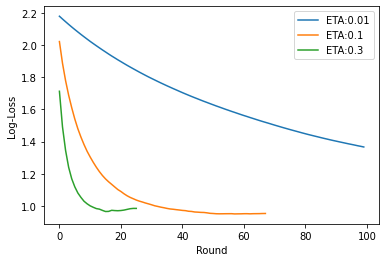

In [138]:
for k,v in scores.items():
    plt.plot(v, label=f"ETA:{k}")
plt.xlabel("Round")
plt.ylabel("Log-Loss")
plt.legend()

In [139]:
for k,v in scores.items():
    print(f"eta:{k:5} - min LogLoss:{min(v)}")

eta: 0.01 - min LogLoss:1.36609
eta:  0.1 - min LogLoss:0.949808
eta:  0.3 - min LogLoss:0.96476


### **----- TMP RESULT -----**

> The best `Log-Loss` for a **XBoost Classification** appears to be around `0.949` with an `eta=0.1`
---

### Search best `max_depth`  <a class="anchor" id="P04_xgboost_max_depth"></a>

In [140]:

values = [1,2,3,4,5,6,7,8,9,10,15,20,25]
xgb_progressbar = xgb_progress(num_rounds*len(values))

scores = {}
xgb_params['eta'] = 0.1

for max_d in values:
    
    progress = dict()

    xgb_params['max_depth'] = max_d

    xgb_model = xgb.train(
        xgb_params, 
        df_train_xgb, 
        num_boost_round=num_rounds, 
        early_stopping_rounds=early_stop,
        verbose_eval=1, 
        evals=watchlist,
        callbacks=[xgb_progressbar],
        evals_result=progress,
    )
    
    print(f"\nmax_depth:{max_d} best_ntree_limit:{xgb_model.best_ntree_limit-1}\n")
    
    scores[max_d] = progress['val']['mlogloss']

  0%|          | 0/1300 [00:00<?, ?it/s]

[22:55:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-mlogloss:2.04383	val-mlogloss:2.04303
[1]	train-mlogloss:1.92199	val-mlogloss:1.91983
[2]	train-mlogloss:1.82131	val-mlogloss:1.81968
[3]	train-mlogloss:1.73605	val-mlogloss:1.73604
[4]	train-mlogloss:1.66266	val-mlogloss:1.66450
[5]	train-mlogloss:1.59861	val-mlogloss:1.60122
[6]	train-mlogloss:1.54200	val-mlogloss:1.54697
[7]	train-mlogloss:1.49173	val-mlogloss:1.49797
[8]	train-mlogloss:1.44658	val-mlogloss:1.45419
[9]	train-mlogloss:1.40607	val-mlogloss:1.41494
[10]	train-mlogloss:1.36934	val-mlogloss:1.38071
[11]	train-mlogloss:1.33606	val-mlogloss:1.34922
[12]	train-mlogloss:1.30577	val-mlogloss:1.32061
[13]	train-mlogloss:1.27799	val-mlogloss:1.29569
[14]	train-mlogloss:1.25254	val-mlogloss:1.27151
[15]	train-mlogloss:1.2

[57]	train-mlogloss:0.78766	val-mlogloss:0.99093
[58]	train-mlogloss:0.78528	val-mlogloss:0.99026
[59]	train-mlogloss:0.78277	val-mlogloss:0.99043
[60]	train-mlogloss:0.78008	val-mlogloss:0.99054
[61]	train-mlogloss:0.77726	val-mlogloss:0.98931
[62]	train-mlogloss:0.77465	val-mlogloss:0.98991
[63]	train-mlogloss:0.77204	val-mlogloss:0.98952
[64]	train-mlogloss:0.76934	val-mlogloss:0.98833
[65]	train-mlogloss:0.76720	val-mlogloss:0.98820
[66]	train-mlogloss:0.76510	val-mlogloss:0.98820
[67]	train-mlogloss:0.76321	val-mlogloss:0.98815
[68]	train-mlogloss:0.76041	val-mlogloss:0.98645
[69]	train-mlogloss:0.75832	val-mlogloss:0.98576
[70]	train-mlogloss:0.75636	val-mlogloss:0.98514
[71]	train-mlogloss:0.75434	val-mlogloss:0.98532
[72]	train-mlogloss:0.75252	val-mlogloss:0.98602
[73]	train-mlogloss:0.75065	val-mlogloss:0.98576
[74]	train-mlogloss:0.74881	val-mlogloss:0.98540
[75]	train-mlogloss:0.74690	val-mlogloss:0.98526
[76]	train-mlogloss:0.74490	val-mlogloss:0.98533
[77]	train-mlogloss:

[52]	train-mlogloss:0.57174	val-mlogloss:0.96536
[53]	train-mlogloss:0.56603	val-mlogloss:0.96605
[54]	train-mlogloss:0.56099	val-mlogloss:0.96617
[55]	train-mlogloss:0.55599	val-mlogloss:0.96620
[56]	train-mlogloss:0.55082	val-mlogloss:0.96517
[57]	train-mlogloss:0.54746	val-mlogloss:0.96554
[58]	train-mlogloss:0.54310	val-mlogloss:0.96474
[59]	train-mlogloss:0.53929	val-mlogloss:0.96493
[60]	train-mlogloss:0.53550	val-mlogloss:0.96499
[61]	train-mlogloss:0.53253	val-mlogloss:0.96538
[62]	train-mlogloss:0.52913	val-mlogloss:0.96569
[63]	train-mlogloss:0.52522	val-mlogloss:0.96527
[64]	train-mlogloss:0.52236	val-mlogloss:0.96520
[65]	train-mlogloss:0.51798	val-mlogloss:0.96490
[66]	train-mlogloss:0.51499	val-mlogloss:0.96530
[67]	train-mlogloss:0.51178	val-mlogloss:0.96591

max_depth:4 best_ntree_limit:58

[22:55:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. 

[65]	train-mlogloss:0.31077	val-mlogloss:0.95157
[66]	train-mlogloss:0.30776	val-mlogloss:0.95226
[67]	train-mlogloss:0.30279	val-mlogloss:0.95252

max_depth:6 best_ntree_limit:57

[22:56:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-mlogloss:1.97383	val-mlogloss:2.02395
[1]	train-mlogloss:1.80305	val-mlogloss:1.89123
[2]	train-mlogloss:1.66197	val-mlogloss:1.77504
[3]	train-mlogloss:1.54420	val-mlogloss:1.68447
[4]	train-mlogloss:1.43976	val-mlogloss:1.60504
[5]	train-mlogloss:1.34825	val-mlogloss:1.53821
[6]	train-mlogloss:1.26856	val-mlogloss:1.47883
[7]	train-mlogloss:1.19515	val-mlogloss:1.42694
[8]	train-mlogloss:1.12988	val-mlogloss:1.38223
[9]	train-mlogloss:1.06924	val-mlogloss:1.34197
[10]	train-mlogloss:1.01503	val-mlogloss:1.30504
[11]	train-mlogloss:0.96492	val-mloglo

[12]	train-mlogloss:0.85093	val-mlogloss:1.24022
[13]	train-mlogloss:0.80674	val-mlogloss:1.21135
[14]	train-mlogloss:0.76848	val-mlogloss:1.18762
[15]	train-mlogloss:0.73221	val-mlogloss:1.16694
[16]	train-mlogloss:0.69581	val-mlogloss:1.14604
[17]	train-mlogloss:0.66571	val-mlogloss:1.12989
[18]	train-mlogloss:0.63827	val-mlogloss:1.11403
[19]	train-mlogloss:0.61395	val-mlogloss:1.09914
[20]	train-mlogloss:0.58921	val-mlogloss:1.08495
[21]	train-mlogloss:0.56571	val-mlogloss:1.07471
[22]	train-mlogloss:0.54597	val-mlogloss:1.06326
[23]	train-mlogloss:0.52534	val-mlogloss:1.05345
[24]	train-mlogloss:0.50578	val-mlogloss:1.04441
[25]	train-mlogloss:0.48780	val-mlogloss:1.03576
[26]	train-mlogloss:0.47173	val-mlogloss:1.02942
[27]	train-mlogloss:0.45577	val-mlogloss:1.02151
[28]	train-mlogloss:0.44177	val-mlogloss:1.01633
[29]	train-mlogloss:0.42694	val-mlogloss:1.01127
[30]	train-mlogloss:0.41176	val-mlogloss:1.00624
[31]	train-mlogloss:0.40000	val-mlogloss:1.00206
[32]	train-mlogloss:

[49]	train-mlogloss:0.13939	val-mlogloss:0.99284
[50]	train-mlogloss:0.13492	val-mlogloss:0.99339
[51]	train-mlogloss:0.13056	val-mlogloss:0.99400

max_depth:15 best_ntree_limit:42

[22:56:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-mlogloss:1.96349	val-mlogloss:2.02347
[1]	train-mlogloss:1.77433	val-mlogloss:1.89599
[2]	train-mlogloss:1.61551	val-mlogloss:1.78319
[3]	train-mlogloss:1.48309	val-mlogloss:1.69335
[4]	train-mlogloss:1.36477	val-mlogloss:1.61672
[5]	train-mlogloss:1.26069	val-mlogloss:1.55116
[6]	train-mlogloss:1.16773	val-mlogloss:1.49161
[7]	train-mlogloss:1.08501	val-mlogloss:1.43895
[8]	train-mlogloss:1.00802	val-mlogloss:1.39127
[9]	train-mlogloss:0.94137	val-mlogloss:1.34895
[10]	train-mlogloss:0.87838	val-mlogloss:1.30923
[11]	train-mlogloss:0.82058	val-mlogl

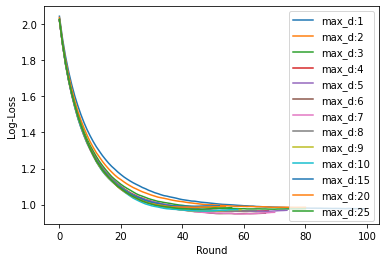

In [141]:
for k,v in scores.items():
    plt.plot(v, label=f"max_d:{k}")
plt.xlabel("Round")
plt.ylabel("Log-Loss")
plt.legend()

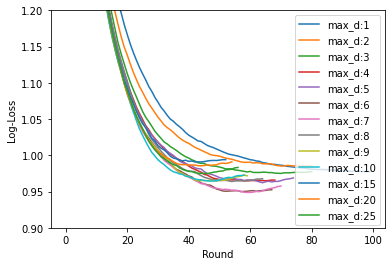

In [142]:
for k,v in scores.items():
    plt.plot(v, label=f"max_d:{k}")
plt.xlabel("Round")
plt.ylabel("Log-Loss")
plt.ylim(0.9,1.2)
plt.legend()

In [143]:
for k,v in scores.items():
    print(f"max_d:{k:2} - min LogLoss:{min(v)}")

max_d: 1 - min LogLoss:0.977372
max_d: 2 - min LogLoss:0.985138
max_d: 3 - min LogLoss:0.975004
max_d: 4 - min LogLoss:0.964742
max_d: 5 - min LogLoss:0.962189
max_d: 6 - min LogLoss:0.949808
max_d: 7 - min LogLoss:0.948696
max_d: 8 - min LogLoss:0.963921
max_d: 9 - min LogLoss:0.9642
max_d:10 - min LogLoss:0.964495
max_d:15 - min LogLoss:0.990815
max_d:20 - min LogLoss:0.985584
max_d:25 - min LogLoss:0.974769


### **----- TMP RESULT -----**

> The best `Log-Loss` for a **XBoost Classification** appears to be around `0.948` with `eta=0.1` and `max_depth=7`
---

### Search best `min_child_weight`  <a class="anchor" id="P04_xgboost_min_child_weight"></a>

In [144]:

values = [1,2,3,4,5,6,7,8,9,10,15,20,25]
xgb_progressbar = xgb_progress(num_rounds*len(values))

scores = {}
xgb_params['eta'] = 0.1
xgb_params['max_depth'] = 7

for min_c in values:
    
    progress = dict()

    xgb_params['min_child_weight'] = min_c

    xgb_model = xgb.train(
        xgb_params, 
        df_train_xgb, 
        num_boost_round=num_rounds, 
        early_stopping_rounds=early_stop,
        verbose_eval=1, 
        evals=watchlist,
        callbacks=[xgb_progressbar],
        evals_result=progress,
    )
    
    print(f"\nmin_child_weight:{min_c} best_ntree_limit:{xgb_model.best_ntree_limit-1}\n")
    
    scores[min_c] = progress['val']['mlogloss']

  0%|          | 0/1300 [00:00<?, ?it/s]

[22:56:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-mlogloss:1.97383	val-mlogloss:2.02395
[1]	train-mlogloss:1.80305	val-mlogloss:1.89123
[2]	train-mlogloss:1.66197	val-mlogloss:1.77504
[3]	train-mlogloss:1.54420	val-mlogloss:1.68447
[4]	train-mlogloss:1.43976	val-mlogloss:1.60504
[5]	train-mlogloss:1.34825	val-mlogloss:1.53821
[6]	train-mlogloss:1.26856	val-mlogloss:1.47883
[7]	train-mlogloss:1.19515	val-mlogloss:1.42694
[8]	train-mlogloss:1.12988	val-mlogloss:1.38223
[9]	train-mlogloss:1.06924	val-mlogloss:1.34197
[10]	train-mlogloss:1.01503	val-mlogloss:1.30504
[11]	train-mlogloss:0.96492	val-mlogloss:1.26923
[12]	train-mlogloss:0.91887	val-mlogloss:1.23860
[13]	train-mlogloss:0.87924	val-mlogloss:1.21178
[14]	train-mlogloss:0.84074	val-mlogloss:1.18626
[15]	train-mlogloss:0.8

[10]	train-mlogloss:1.09835	val-mlogloss:1.30960
[11]	train-mlogloss:1.05539	val-mlogloss:1.27703
[12]	train-mlogloss:1.01081	val-mlogloss:1.24778
[13]	train-mlogloss:0.97331	val-mlogloss:1.22116
[14]	train-mlogloss:0.93846	val-mlogloss:1.19768
[15]	train-mlogloss:0.90779	val-mlogloss:1.17621
[16]	train-mlogloss:0.87631	val-mlogloss:1.15582
[17]	train-mlogloss:0.84879	val-mlogloss:1.14021
[18]	train-mlogloss:0.82540	val-mlogloss:1.12397
[19]	train-mlogloss:0.80132	val-mlogloss:1.11003
[20]	train-mlogloss:0.77643	val-mlogloss:1.09629
[21]	train-mlogloss:0.75422	val-mlogloss:1.08614
[22]	train-mlogloss:0.73172	val-mlogloss:1.07616
[23]	train-mlogloss:0.71347	val-mlogloss:1.06746
[24]	train-mlogloss:0.69514	val-mlogloss:1.05807
[25]	train-mlogloss:0.67771	val-mlogloss:1.05118
[26]	train-mlogloss:0.66026	val-mlogloss:1.04254
[27]	train-mlogloss:0.64580	val-mlogloss:1.03514
[28]	train-mlogloss:0.63011	val-mlogloss:1.02794
[29]	train-mlogloss:0.61815	val-mlogloss:1.02069
[30]	train-mlogloss:


min_child_weight:4 best_ntree_limit:72

[22:57:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-mlogloss:1.99603	val-mlogloss:2.02094
[1]	train-mlogloss:1.84279	val-mlogloss:1.88025
[2]	train-mlogloss:1.71862	val-mlogloss:1.76988
[3]	train-mlogloss:1.61129	val-mlogloss:1.67993
[4]	train-mlogloss:1.51939	val-mlogloss:1.60400
[5]	train-mlogloss:1.43851	val-mlogloss:1.53796
[6]	train-mlogloss:1.36581	val-mlogloss:1.47924
[7]	train-mlogloss:1.30112	val-mlogloss:1.42741
[8]	train-mlogloss:1.24280	val-mlogloss:1.37999
[9]	train-mlogloss:1.19066	val-mlogloss:1.34016
[10]	train-mlogloss:1.14185	val-mlogloss:1.30299
[11]	train-mlogloss:1.09811	val-mlogloss:1.27116
[12]	train-mlogloss:1.05773	val-mlogloss:1.24303
[13]	train-mlogloss:1.02213	val-mlogloss:1.21875
[14]	train-mlogloss:0.98968	val

[71]	train-mlogloss:0.45058	val-mlogloss:0.95940
[72]	train-mlogloss:0.44779	val-mlogloss:0.95935
[73]	train-mlogloss:0.44481	val-mlogloss:0.95932
[74]	train-mlogloss:0.44198	val-mlogloss:0.96081
[75]	train-mlogloss:0.43934	val-mlogloss:0.96168
[76]	train-mlogloss:0.43645	val-mlogloss:0.96280
[77]	train-mlogloss:0.43397	val-mlogloss:0.96254
[78]	train-mlogloss:0.43236	val-mlogloss:0.96256
[79]	train-mlogloss:0.43025	val-mlogloss:0.96418

min_child_weight:6 best_ntree_limit:69

[22:57:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-mlogloss:2.00468	val-mlogloss:2.02256
[1]	train-mlogloss:1.85604	val-mlogloss:1.88676
[2]	train-mlogloss:1.73216	val-mlogloss:1.77658
[3]	train-mlogloss:1.62886	val-mlogloss:1.68551
[4]	train-mlogloss:1.53895	val-mlogloss:1.60940
[5]	train-mlogloss:1.45879

[75]	train-mlogloss:0.50913	val-mlogloss:0.95603
[76]	train-mlogloss:0.50521	val-mlogloss:0.95607
[77]	train-mlogloss:0.50170	val-mlogloss:0.95682
[78]	train-mlogloss:0.49887	val-mlogloss:0.95666

min_child_weight:8 best_ntree_limit:69

[22:57:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-mlogloss:2.00829	val-mlogloss:2.02604
[1]	train-mlogloss:1.86242	val-mlogloss:1.89114
[2]	train-mlogloss:1.74285	val-mlogloss:1.78188
[3]	train-mlogloss:1.63879	val-mlogloss:1.69472
[4]	train-mlogloss:1.54825	val-mlogloss:1.61641
[5]	train-mlogloss:1.47045	val-mlogloss:1.55164
[6]	train-mlogloss:1.40231	val-mlogloss:1.49221
[7]	train-mlogloss:1.34001	val-mlogloss:1.44124
[8]	train-mlogloss:1.28379	val-mlogloss:1.39631
[9]	train-mlogloss:1.23375	val-mlogloss:1.35611
[10]	train-mlogloss:1.18955	val

[19]	train-mlogloss:0.98090	val-mlogloss:1.13176
[20]	train-mlogloss:0.96350	val-mlogloss:1.11793
[21]	train-mlogloss:0.94772	val-mlogloss:1.10598
[22]	train-mlogloss:0.93191	val-mlogloss:1.09462
[23]	train-mlogloss:0.91544	val-mlogloss:1.08697
[24]	train-mlogloss:0.90192	val-mlogloss:1.07739
[25]	train-mlogloss:0.88848	val-mlogloss:1.06869
[26]	train-mlogloss:0.87754	val-mlogloss:1.06086
[27]	train-mlogloss:0.86636	val-mlogloss:1.05295
[28]	train-mlogloss:0.85491	val-mlogloss:1.04551
[29]	train-mlogloss:0.84447	val-mlogloss:1.03807
[30]	train-mlogloss:0.83449	val-mlogloss:1.03221
[31]	train-mlogloss:0.82376	val-mlogloss:1.02774
[32]	train-mlogloss:0.81421	val-mlogloss:1.02365
[33]	train-mlogloss:0.80488	val-mlogloss:1.01893
[34]	train-mlogloss:0.79727	val-mlogloss:1.01497
[35]	train-mlogloss:0.78920	val-mlogloss:1.01181
[36]	train-mlogloss:0.78146	val-mlogloss:1.00865
[37]	train-mlogloss:0.77398	val-mlogloss:1.00594
[38]	train-mlogloss:0.76662	val-mlogloss:1.00405
[39]	train-mlogloss:

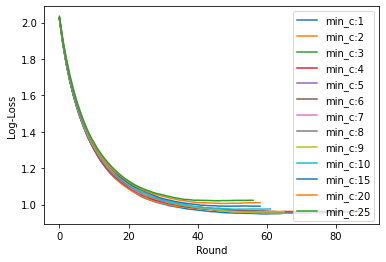

In [145]:
for k,v in scores.items():
    plt.plot(v, label=f"min_c:{k}")
plt.xlabel("Round")
plt.ylabel("Log-Loss")
plt.legend()

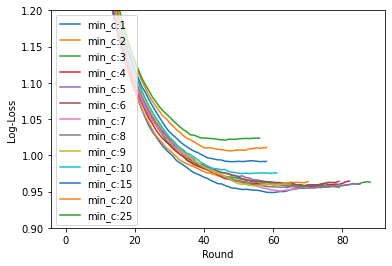

In [146]:
for k,v in scores.items():
    plt.plot(v, label=f"min_c:{k}")
plt.xlabel("Round")
plt.ylabel("Log-Loss")
plt.ylim(0.9,1.2)
plt.legend()

In [147]:
for k,v in scores.items():
    print(f"min_child_weight:{k:2} - min Log-Loss:{min(v)}")

min_child_weight: 1 - min Log-Loss:0.948695
min_child_weight: 2 - min Log-Loss:0.961096
min_child_weight: 3 - min Log-Loss:0.957039
min_child_weight: 4 - min Log-Loss:0.956367
min_child_weight: 5 - min Log-Loss:0.956431
min_child_weight: 6 - min Log-Loss:0.957854
min_child_weight: 7 - min Log-Loss:0.950615
min_child_weight: 8 - min Log-Loss:0.954485
min_child_weight: 9 - min Log-Loss:0.958017
min_child_weight:10 - min Log-Loss:0.974796
min_child_weight:15 - min Log-Loss:0.991155
min_child_weight:20 - min Log-Loss:1.00623
min_child_weight:25 - min Log-Loss:1.020889


### **----- TMP RESULT -----**

> The best `Log-Loss` for a **XBoost Classification** appears to be around `0.948` with `eta=0.1`, `max_depth=7`, `min_child_weight=1` and a `best_ntree_limit=60`
---

### Evaluate with `ROC AUC score`  <a class="anchor" id="P04_xgboost_rocauc"></a>

In [174]:
xgb_model2 = xgb.XGBClassifier(n_estimators=num_rounds, learning_rate=0.1, max_depth=7, min_child_weight=1, objective='multi:softmax', num_class=max(y_pred)+1, random_state=1)

In [193]:
watchlist = [(dt_train_full, y_train_full), (dt_test, y_test)]

In [194]:
xgb_model2.fit(dt_train_full, y_train_full, eval_set=watchlist, early_stopping_rounds=early_stop)

[23:11:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:1.64500	validation_1-mlogloss:1.68326
[1]	validation_0-mlogloss:1.52545	validation_1-mlogloss:1.59504


/home/valkea/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[2]	validation_0-mlogloss:1.42362	validation_1-mlogloss:1.51950
[3]	validation_0-mlogloss:1.33528	validation_1-mlogloss:1.45421
[4]	validation_0-mlogloss:1.25650	validation_1-mlogloss:1.39695
[5]	validation_0-mlogloss:1.18534	validation_1-mlogloss:1.34817
[6]	validation_0-mlogloss:1.12059	validation_1-mlogloss:1.30419
[7]	validation_0-mlogloss:1.06390	validation_1-mlogloss:1.26503
[8]	validation_0-mlogloss:1.01231	validation_1-mlogloss:1.23137
[9]	validation_0-mlogloss:0.96497	validation_1-mlogloss:1.20101
[10]	validation_0-mlogloss:0.92299	validation_1-mlogloss:1.17259
[11]	validation_0-mlogloss:0.87838	validation_1-mlogloss:1.14184
[12]	validation_0-mlogloss:0.84096	validation_1-mlogloss:1.11759
[13]	validation_0-mlogloss:0.80833	validation_1-mlogloss:1.09604
[14]	validation_0-mlogloss:0.77627	validation_1-mlogloss:1.07624
[15]	validation_0-mlogloss:0.74927	validation_1-mlogloss:1.05905
[16]	validation_0-mlogloss:0.72214	validation_1-mlogloss:1.04263
[17]	validation_0-mlogloss:0.6990

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_class=9, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [195]:
xgb_model2.best_ntree_limit-1

78

I evualute the model using the `test` set because the Validation is included in the `training_full` set.

In [202]:
y_pred = xgb_model2.predict(dt_test)
y_pred_proba = xgb_model2.predict_proba(dt_test)

In [203]:
evaluate_classification(y_test, y_pred, y_pred_proba)

ROCAUC: 0.791 | F1: 0.642 (precision: 0.631 & recall: 0.656) | Accuracy: 0.656


(0.7906237259835716, 0.6418762716808242)

### **----- FINAL XGBoost RESULT -----**

> The best `ROC AUC score` for a **XBoost Classification** appears to be around `0.791` *(on the test set)*
---

## TO-TEST (later)

In [ ]:
xgb_model.best_ntree_limit

## Model results <a class="anchor" id="P04_result"></a>

* The best `ROC AUC score` for a basic **Logistic Regression** appears to be around `0.644`
* The best `ROC AUC score` for a **Decision Tree** appears to be around `0.791` with `max_depth=5` and `min_samples_leaf=15`
* The best `ROC AUC score` for a **Random Forest** appears to be around `0.843` with `n_estimarors=500` and `max_depth=20`
* The best `ROC AUC score` for a **XBoost Classification** appears to be around `0.791` *(on the test set)*

> The **Random Forest** model appears to be the best model at the moment *(but we could try more models and fine tune more parameters)*.

**Let's export the selected model**

# 5. Export the selected model <a class="anchor" id="P05"></a>

### Train a Random Forest model with the best parameters on the train_full dataset <a class="anchor" id="P05_train"></a>

In [206]:
rforest_model = RandomForestClassifier(n_estimators=500, random_state=1, n_jobs=-1, max_depth=20)
rforest_model.fit(dt_train_full, y_train_full)

y_pred = rforest_model.predict(dt_test)
y_pred_proba = rforest_model.predict_proba(dt_test)

evaluate_classification(y_test, y_pred, y_pred_proba)

ROCAUC: 0.872 | F1: 0.644 (precision: 0.630 & recall: 0.662) | Accuracy: 0.662


(0.8719815805432454, 0.6444622248945622)

### Save the model <a class="anchor" id="P05_export"></a>

In [207]:
import pickle

In [210]:
with open('model.bin', 'wb') as f_out:
    pickle.dump((rforest_model), f_out)

In [217]:
dt_test.values[10], y_test.values[10]

(array([11.8   ,  0.51  ,  0.66  ,  0.64  , 15.    ,  0.9973]), 7)

In [218]:
dt_test.values[100], y_test.values[100]

(array([ 9.9    ,  0.88   ,  0.56   ,  0.04   , 20.     ,  0.99636]), 5)